In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [ ]:
# Step 1: Load and preprocess the MNIST dataset
# A dataset is a collection of data samples and their corresponding labels. Here, we use the MNIST dataset,
# which contains images of handwritten digits and their labels (0-9).

transform = transforms.Compose([
    transforms.ToTensor(),  # Converts images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
val_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

100%|██████████| 9.91M/9.91M [00:11<00:00, 900kB/s] 
100%|██████████| 28.9k/28.9k [00:00<00:00, 129kB/s]
100%|██████████| 1.65M/1.65M [00:01<00:00, 1.22MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.09MB/s]


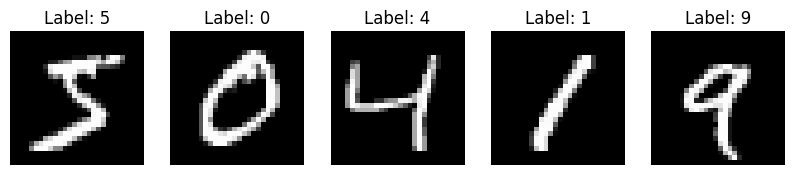

In [ ]:
# Visualize some sample images from the dataset
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    image, label = train_dataset[i]
    axes[i].imshow(image.squeeze(), cmap='gray')
    axes[i].set_title(f'Label: {label}')
    axes[i].axis('off')
plt.show()

In [ ]:
# A DataLoader is an iterator that loads batches of data from a dataset.
# It makes it easier to process data in mini-batches, shuffle the data, and load it in parallel using multiprocessing.
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)

In [ ]:
# Step 2: Define the MLP model for MNIST classification
# A model in PyTorch is defined as a subclass of `nn.Module`. It represents a neural network.
# The MLP (Multi-Layer Perceptron) consists of fully connected layers.
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Input and first hidden layer sizes
        self.fc2 = nn.Linear(128, 64)  # First hidden to second hidden layer
        self.fc3 = nn.Linear(64, 10)  # Second hidden to output layer (10 classes for MNIST)

    def forward(self, x):
        # The forward method defines the computation performed at every call of the model.
        x = x.view(x.size(0), -1)  # Flatten the input tensor
        x = torch.relu(self.fc1(x))  # Activation function + the first layer
        x = torch.relu(self.fc2(x))  # Activation function + the second layer
        x = self.fc3(x)  # Output layer
        return x

In [ ]:
model = MLP()

# Step 3: Set up the loss function and optimizer
# A loss function measures how far the model's predictions are from the actual labels.
# An optimizer updates the model's weights to minimize the loss function.
criterion = nn.CrossEntropyLoss()  # Choose a loss function (e.g., CrossEntropyLoss)
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)  # Choose an optimizer and learning rate

In [ ]:
# Step 4: Training loop
# The training loop is where the model learns by processing batches of data, calculating the loss, and updating weights.
num_epochs = 10
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0
    for batch in train_loader:
        images, labels = batch
        optimizer.zero_grad()  # Clear gradients from the previous step
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        total_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(train_loader):.4f}")

    # Validation step
    # Validation checks the model's performance on unseen data (not used during training).
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in val_loader:
            images, labels = batch
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the class with the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Validation Accuracy: {accuracy:.2f}%")

Epoch [1/10], Loss: 2.2268
Validation Accuracy: 36.72%
Epoch [2/10], Loss: 1.9820
Validation Accuracy: 61.30%
Epoch [3/10], Loss: 1.5383
Validation Accuracy: 72.54%
Epoch [4/10], Loss: 1.0926
Validation Accuracy: 78.74%
Epoch [5/10], Loss: 0.8201
Validation Accuracy: 82.29%
Epoch [6/10], Loss: 0.6686
Validation Accuracy: 84.61%
Epoch [7/10], Loss: 0.5772
Validation Accuracy: 86.07%
Epoch [8/10], Loss: 0.5172
Validation Accuracy: 87.24%
Epoch [9/10], Loss: 0.4752
Validation Accuracy: 87.88%
Epoch [10/10], Loss: 0.4445
Validation Accuracy: 88.58%


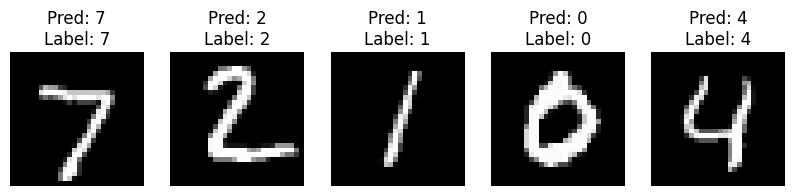

In [ ]:
# Step 5: Evaluate the model on a few samples
# Evaluate the model on a small batch of data to inspect predictions.
model.eval()
with torch.no_grad():
    sample_images, sample_labels = next(iter(val_loader))
    outputs = model(sample_images)
    _, predictions = torch.max(outputs, 1)

    # Visualize predictions
    fig, axes = plt.subplots(1, 5, figsize=(10, 2))
    for i in range(5):
        axes[i].imshow(sample_images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'Pred: {predictions[i].item()}\nLabel: {sample_labels[i].item()}')
        axes[i].axis('off')
    plt.show()
